In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
data = pd.read_csv("sickness_table.csv")

In [17]:
data.head(10)

,Unnamed: 0,date,n_sick,calls,n_duty,n_sby,sby_need,dafted
0,0,2016-04-01,73,8154.0,1700,90,4.0,0.0
1,1,2016-04-02,64,8526.0,1700,90,70.0,0.0
2,2,2016-04-03,68,8088.0,1700,90,0.0,0.0
3,3,2016-04-04,71,7044.0,1700,90,0.0,0.0
4,4,2016-04-05,63,7236.0,1700,90,0.0,0.0
5,5,2016-04-06,70,6492.0,1700,90,0.0,0.0
6,6,2016-04-07,64,6204.0,1700,90,0.0,0.0
7,7,2016-04-08,62,7614.0,1700,90,0.0,0.0
8,8,2016-04-09,51,5706.0,1700,90,0.0,0.0
9,9,2016-04-10,54,6606.0,1700,90,0.0,0.0


In [23]:
# 1.1 Remove Redundant Columns
# Drop the 'Unnamed: 0' column (if it exists)
if 'Unnamed: 0' in data.columns:
    sickness_data = data.drop(columns=['Unnamed: 0'])

,date,n_sick,calls,n_duty,n_sby,sby_need,dafted
0,2016-04-01,73,8154.0,1700,90,4.0,0.0
1,2016-04-02,64,8526.0,1700,90,70.0,0.0
2,2016-04-03,68,8088.0,1700,90,0.0,0.0
3,2016-04-04,71,7044.0,1700,90,0.0,0.0
4,2016-04-05,63,7236.0,1700,90,0.0,0.0


In [27]:
# Convert the 'date' column to datetime format
sickness_data['date'] = pd.to_datetime(sickness_data['date'])

In [29]:
sickness_data.head()

,date,n_sick,calls,n_duty,n_sby,sby_need,dafted
0,2016-04-01,73,8154.0,1700,90,4.0,0.0
1,2016-04-02,64,8526.0,1700,90,70.0,0.0
2,2016-04-03,68,8088.0,1700,90,0.0,0.0
3,2016-04-04,71,7044.0,1700,90,0.0,0.0
4,2016-04-05,63,7236.0,1700,90,0.0,0.0


In [25]:
# 1.2 Missing Value Analysis
# Check for missing values
missing_values = sickness_data.isnull().sum()
print(missing_values)

date        0
n_sick      0
calls       0
n_duty      0
n_sby       0
sby_need    0
dafted      0
dtype: int64


In [28]:
sickness_data.info()
sickness_data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1152 entries, 0 to 1151
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      1152 non-null   datetime64[ns]
 1   n_sick    1152 non-null   int64         
 2   calls     1152 non-null   float64       
 3   n_duty    1152 non-null   int64         
 4   n_sby     1152 non-null   int64         
 5   sby_need  1152 non-null   float64       
 6   dafted    1152 non-null   float64       
dtypes: datetime64[ns](1), float64(3), int64(3)
memory usage: 63.1 KB


,date,n_sick,calls,n_duty,n_sby,sby_need,dafted
count,1152,1152.000000,1152.000000,1152.000000,1152.0,1152.000000,1152.000000
mean,2017-10-28 12:00:00,68.808160,7919.531250,1820.572917,90.0,34.718750,16.335938
min,2016-04-01 00:00:00,36.000000,4074.000000,1700.000000,90.0,0.000000,0.000000
25%,2017-01-13 18:00:00,58.000000,6978.000000,1800.000000,90.0,0.000000,0.000000
50%,2017-10-28 12:00:00,68.000000,7932.000000,1800.000000,90.0,0.000000,0.000000
75%,2018-08-12 06:00:00,78.000000,8827.500000,1900.000000,90.0,12.250000,0.000000
max,2019-05-27 00:00:00,119.000000,11850.000000,1900.000000,90.0,555.000000,465.000000
std,NaN,14.293942,1290.063571,80.086953,0.0,79.694251,53.394089


Data Exploration

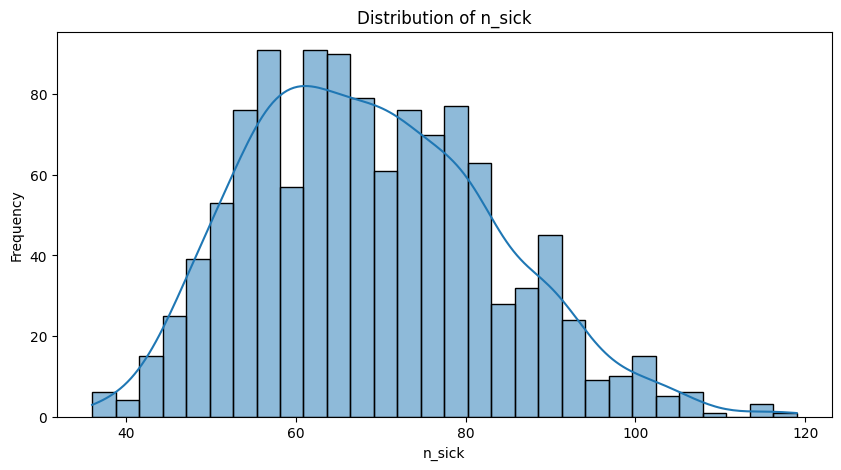

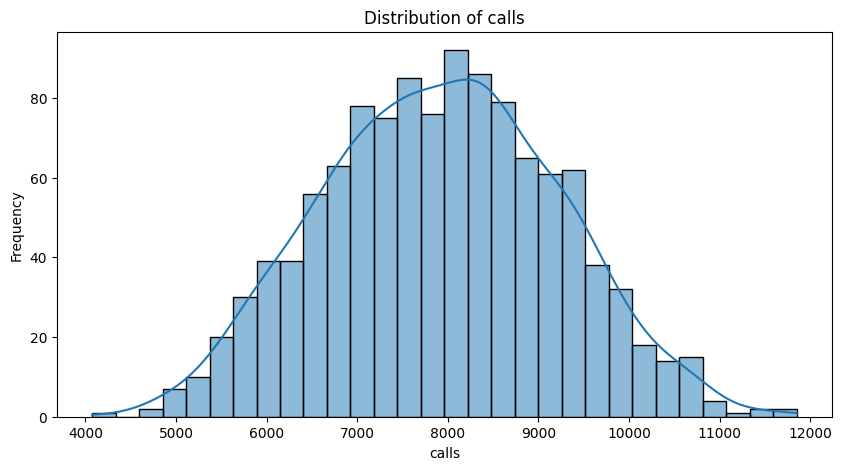

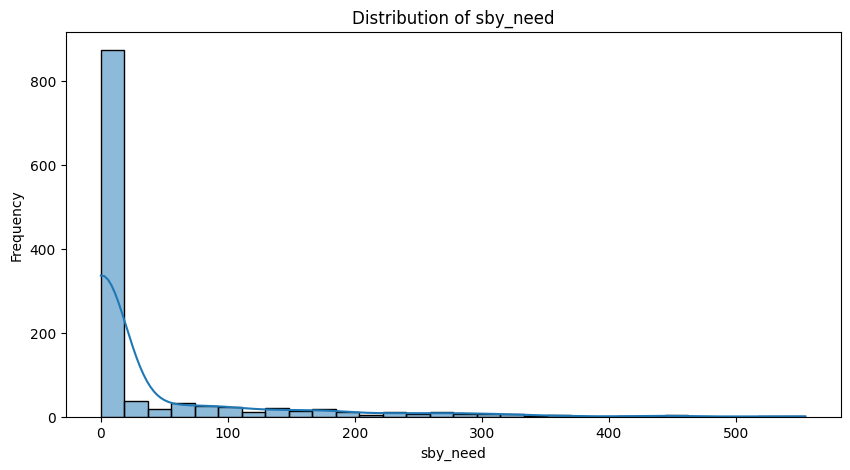

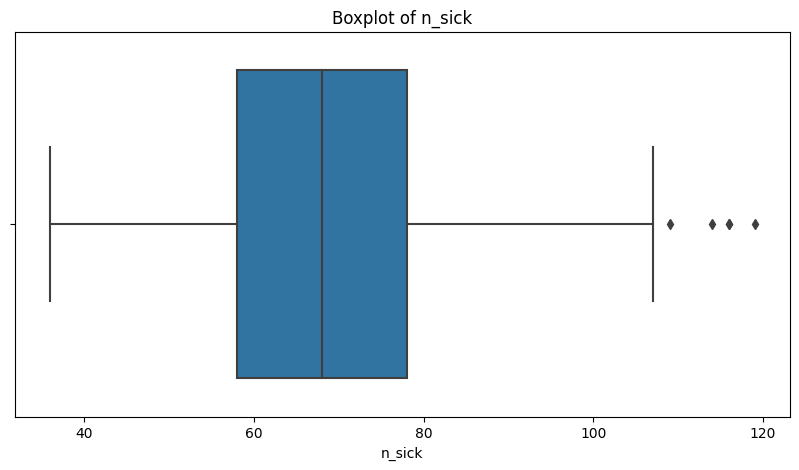

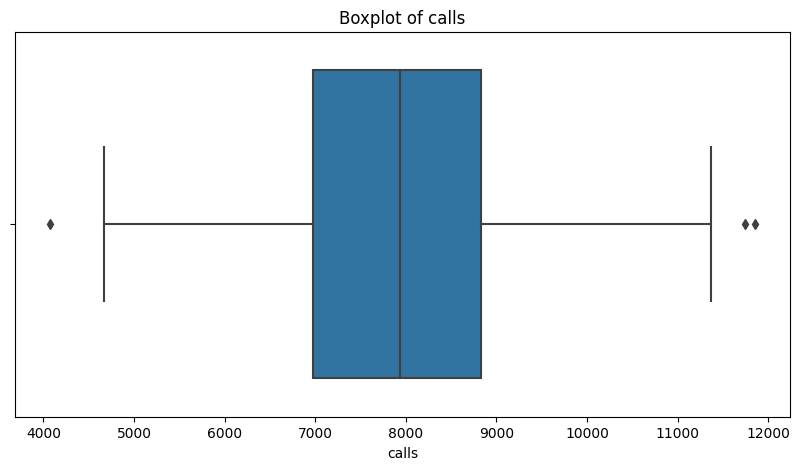

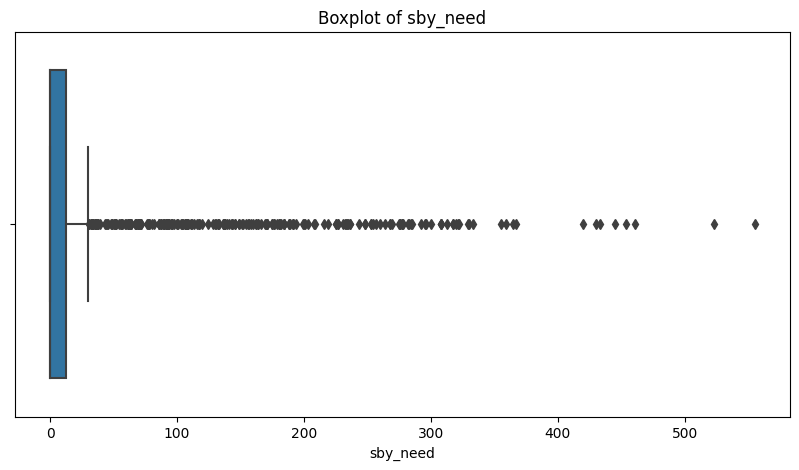

                mean     50%          std
n_sick      68.80816    68.0    14.293942
calls     7919.53125  7932.0  1290.063571
sby_need    34.71875     0.0    79.694251
Number of outliers detected in n_sick: 5
Number of outliers detected in calls: 3
Number of outliers detected in sby_need: 256


In [30]:
# Columns of interest
columns_to_analyze = ['n_sick', 'calls', 'sby_need']

# Histograms for Distribution Analysis
for column in columns_to_analyze:
    plt.figure(figsize=(10, 5))
    sns.histplot(sickness_data[column], kde=True, bins=30)
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

# Boxplots for Outlier Analysis
for column in columns_to_analyze:
    plt.figure(figsize=(10, 5))
    sns.boxplot(x=sickness_data[column])
    plt.title(f'Boxplot of {column}')
    plt.xlabel(column)
    plt.show()

# Summary Statistics
summary_stats = sickness_data[columns_to_analyze].describe().T[['mean', '50%', 'std']]
print(summary_stats)

# IQR for Outlier Detection
for column in columns_to_analyze:
    Q1 = sickness_data[column].quantile(0.25)
    Q3 = sickness_data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    outliers = sickness_data[(sickness_data[column] < lower_bound) | (sickness_data[column] > upper_bound)]
    print(f"Number of outliers detected in {column}: {len(outliers)}")

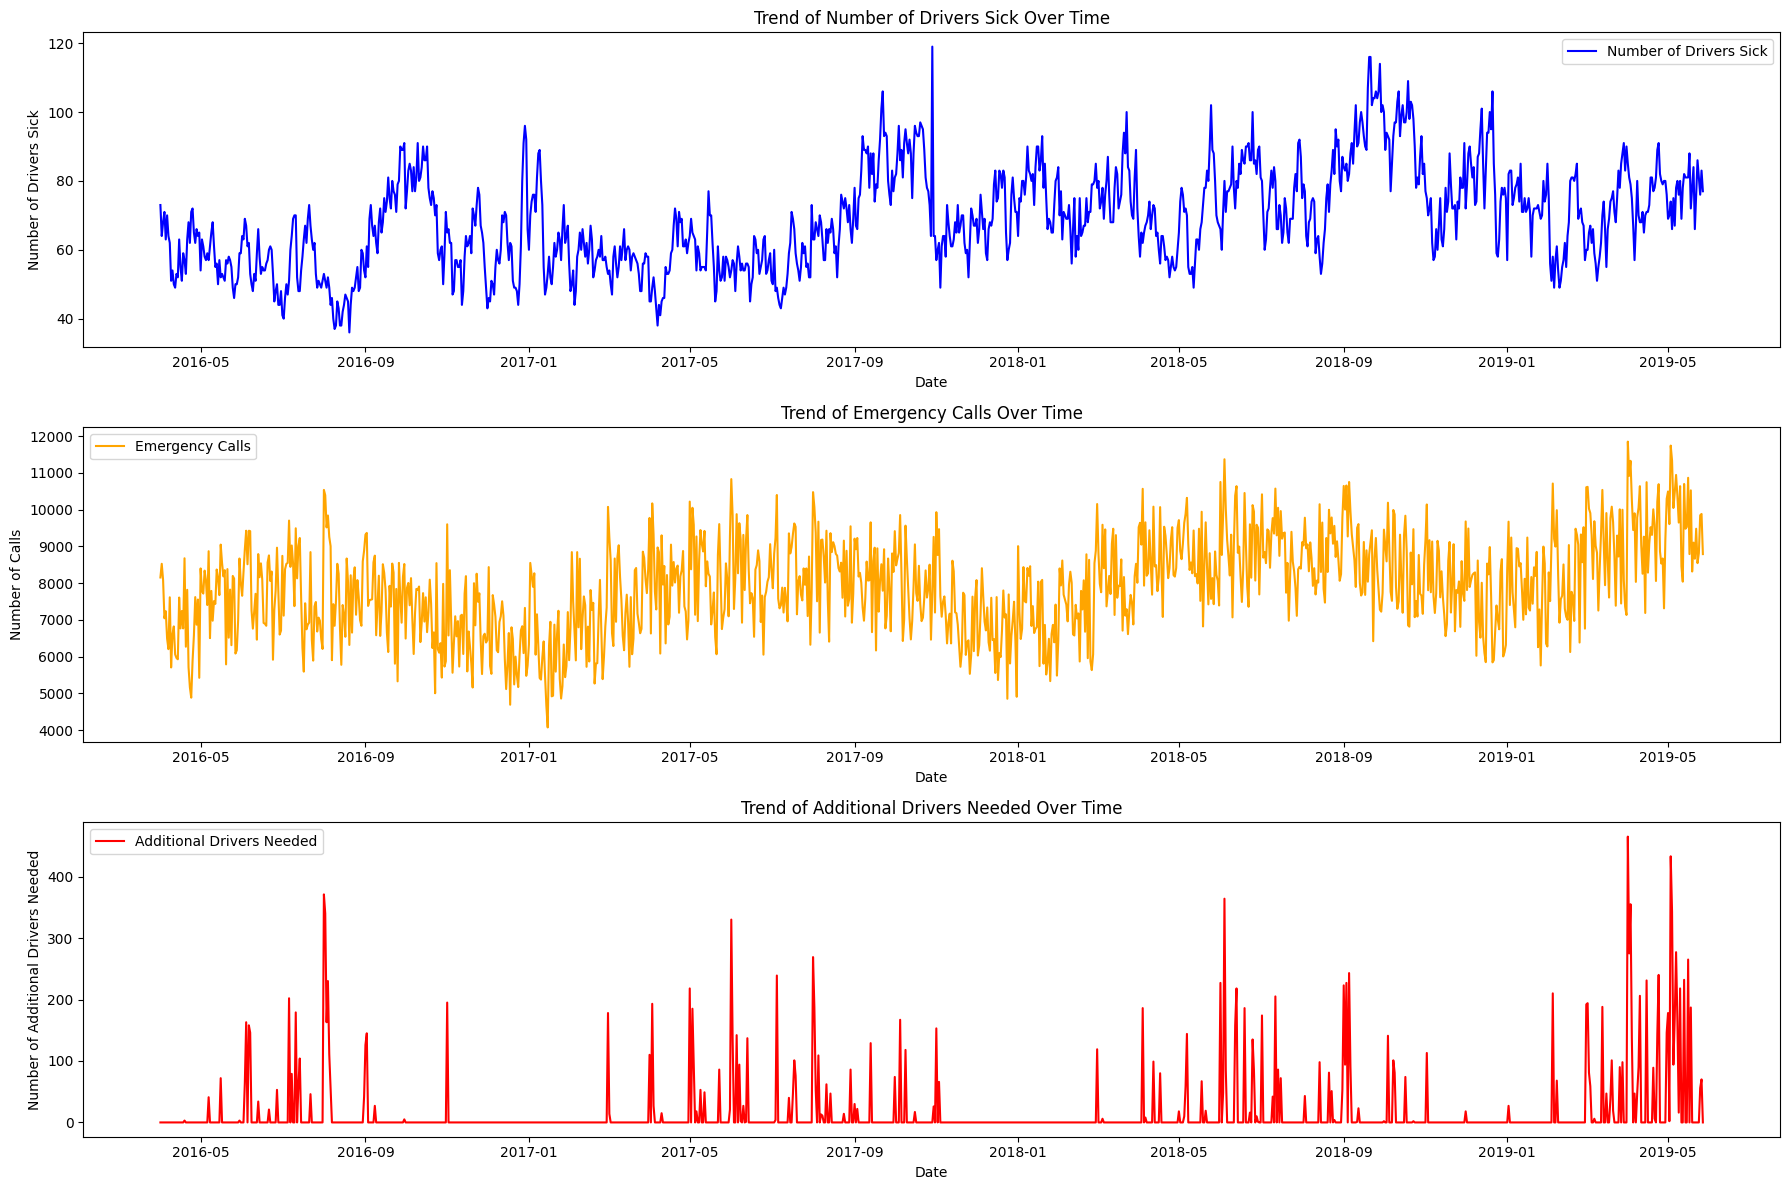

In [31]:
# Time Series Analysis
plt.figure(figsize=(18, 12))

# Plotting n_sick over time
plt.subplot(3, 1, 1)
plt.plot(sickness_data['date'], sickness_data['n_sick'], label='Number of Drivers Sick', color='blue')
plt.title('Trend of Number of Drivers Sick Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Drivers Sick')
plt.legend()

# Plotting calls over time
plt.subplot(3, 1, 2)
plt.plot(sickness_data['date'], sickness_data['calls'], label='Emergency Calls', color='orange')
plt.title('Trend of Emergency Calls Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Calls')
plt.legend()

# Plotting dafted over time
plt.subplot(3, 1, 3)
plt.plot(sickness_data['date'], sickness_data['dafted'], label='Additional Drivers Needed', color='red')
plt.title('Trend of Additional Drivers Needed Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Additional Drivers Needed')
plt.legend()

plt.tight_layout()
plt.show()